In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots
import sklearn
from sklearn.mixture import GaussianMixture

In [2]:
data = np.load('formationchannels.npy')
print('Shape:', (data).shape)

Shape: (2950, 1)


[20945.97260859 20753.49600712 20083.0789467  20101.60043333
 20112.97520001 20122.21265546 20120.26026831 20138.6786255
 20139.49362103 20139.78412228]


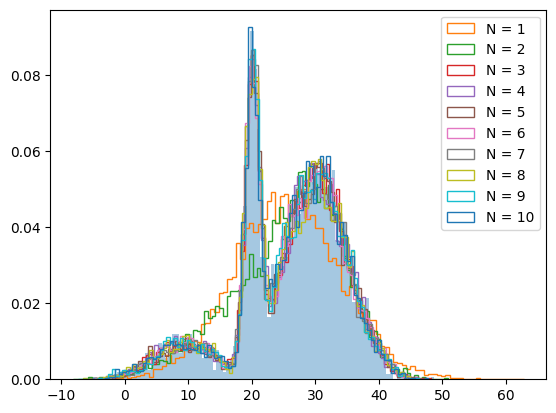

In [3]:
ncomp_arr = np.linspace(1,10,10).astype(int)
AIC = np.zeros(10)

x0 = np.linspace(0,50,1000)
x = x0[:,np.newaxis]
n_sample = 10000

plt.hist(data, bins=100, density=True, alpha=0.4)

for ncomponents in ncomp_arr[:10]:
    model = GaussianMixture(n_components=ncomponents)
    gm = model.fit(data)
    samples = gm.sample(n_sample)
    plt.hist(samples[0], bins=100, density=True, histtype='step', label="N = "+str(ncomponents))
    AIC[ncomponents-1] = gm.aic(data)
    
print(AIC)

plt.legend()
plt.show()

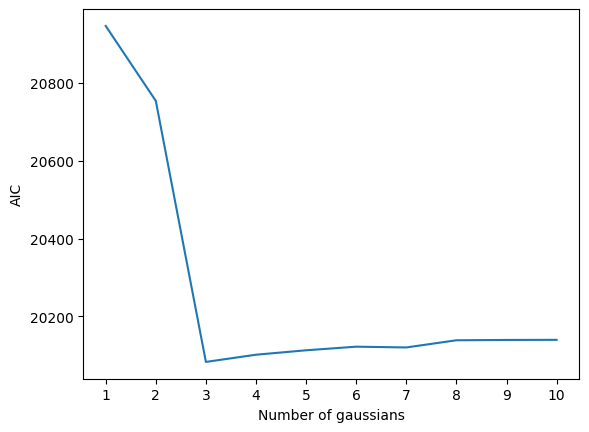

In [4]:
plt.plot(ncomp_arr, AIC)

plt.xlabel('Number of gaussians')
plt.ylabel('AIC')
plt.xticks(range(min(ncomp_arr), max(ncomp_arr) + 1))

plt.show()

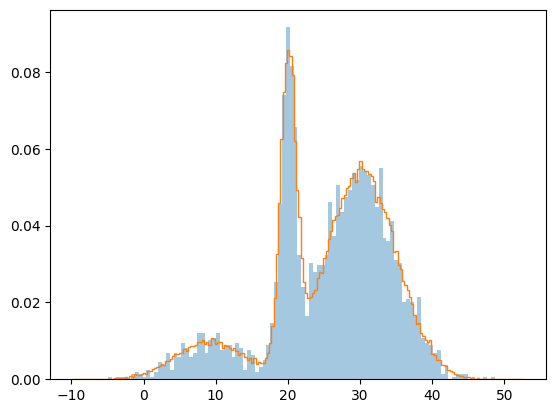

In [5]:
ncomponents = 3

model = GaussianMixture(n_components=ncomponents)
gm = model.fit(data)

n_sample = 100000
samples = gm.sample(n_sample)
#print(samples)

plt.hist(data, bins=100, density=True, alpha=0.4)
plt.hist(samples[0], bins=200, density=True, histtype='step')

plt.show()

Log-Likelihoods:
[-5.16283343 -4.84003395 -4.78361742 -5.29524969 -4.99911741]

Probabilità di appartenenza:
[[2.87073025e-01 3.16916269e-01 3.96010706e-01]
 [3.79753465e-05 6.61548027e-38 9.99962025e-01]
 [5.43487260e-05 1.05841390e-35 9.99945651e-01]
 [5.32645982e-06 3.28254224e-51 9.99994674e-01]
 [2.34513195e-02 2.53386722e-08 9.76548655e-01]]


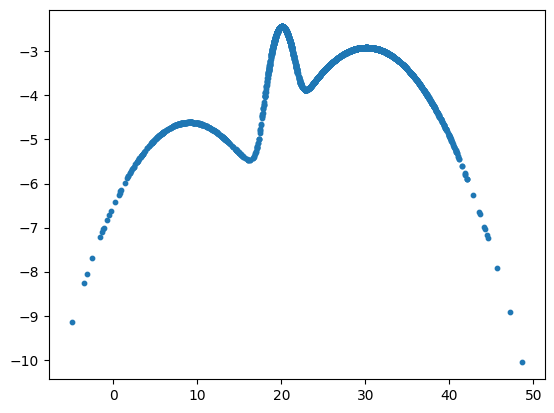

In [16]:
# Calcoliamo i log-likelihood di ciascun campione rispetto al modello
log_likelihoods = gm.score_samples(data)

# Stampiamo i primi 5 log-likelihoods e le prime 5 probabilità
print("Log-Likelihoods:")
print(log_likelihoods[:5])

plt.scatter(data,log_likelihoods, s=10)
plt.show()



Probabilità di appartenenza:
[[2.87073025e-01 3.16916269e-01 3.96010706e-01]
 [3.79753465e-05 6.61548027e-38 9.99962025e-01]
 [5.43487260e-05 1.05841390e-35 9.99945651e-01]
 [5.32645982e-06 3.28254224e-51 9.99994674e-01]
 [2.34513195e-02 2.53386722e-08 9.76548655e-01]]


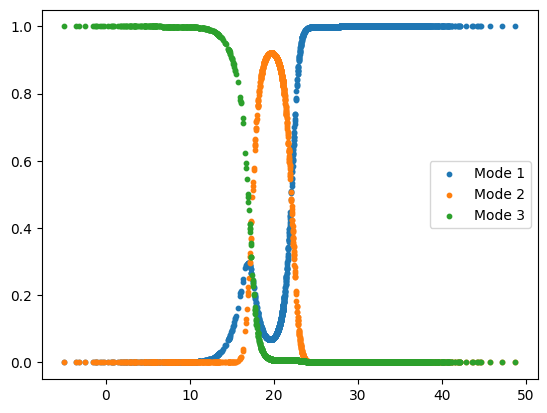

In [19]:
# Otteniamo le probabilità di appartenenza di ciascun campione a ciascun componente
probs = gm.predict_proba(data)

print("\nProbabilità di appartenenza:")
print(probs[:5])

plt.scatter(data,probs[:,0], s=10, label="Mode 1")
plt.scatter(data,probs[:,1], s=10, label="Mode 2")
plt.scatter(data,probs[:,2], s=10, label="Mode 3")

plt.legend()
plt.show()


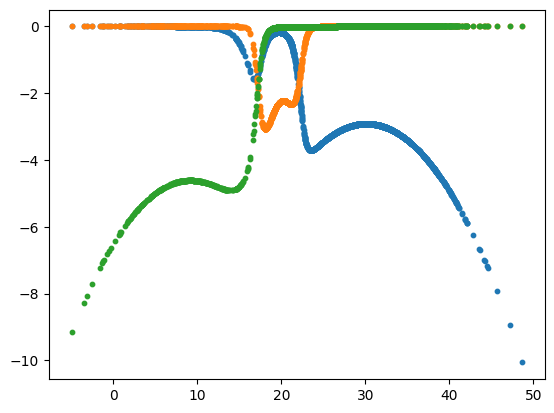

In [21]:
plt.scatter(data,probs[:,0]*log_likelihoods, s=10, label="Mode 1")
plt.scatter(data,probs[:,1]*log_likelihoods, s=10, label="Mode 2")
plt.scatter(data,probs[:,2]*log_likelihoods, s=10, label="Mode 3")
plt.show()
